<a href="https://colab.research.google.com/github/Sara-harba/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Segmentation 

## K-Means 

In [ ]:
!pip install kneed
!pip install plotly

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#mount the drive to get to our data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#upload the data
customers = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We would like to segment our mall customers based on their age, annual income, and spending score

In [ ]:
X = customers[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
#experiment with K-means algorithms with k=3
kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(X)
identified_clusters = kmean.fit_predict(X)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

### Checking different k using the Elbow Method 

5


Text(0, 0.5, 'Within Cluster Sum Of Square')

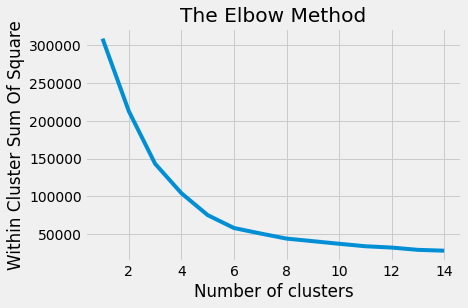

In [ ]:
within_cluster_sum_of_square=[]
for i in range(1,15):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  within_cluster_sum_of_square_iter = kmeans.inertia_
  within_cluster_sum_of_square.append(within_cluster_sum_of_square_iter)

kl = KneeLocator(range(1,15), within_cluster_sum_of_square, curve="convex", direction="decreasing")
print(kl.elbow)

plt.style.use("fivethirtyeight")
number_clusters = range(1,15)
plt.plot(number_clusters,within_cluster_sum_of_square)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum Of Square')

In [ ]:
#Visualize the clusters
kmean = KMeans(n_clusters=5, random_state=42)
kmean.fit(X)
identified_clusters = kmean.fit_predict(X)
data_with_clusters = X.copy()
data_with_clusters['Clusters'] = identified_clusters

fig = px.scatter_3d(data_with_clusters, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Clusters')
fig.show()


Checking different k using the Silhouette Score (this is also used to evaluate the clustering if true labels are unknown)

[0.293166070535953, 0.3839349967742105, 0.40546302077733304, 0.44428597560893024, 0.4523443947724053, 0.4398198217929885, 0.42786362446871096, 0.4152386247266623, 0.4052873245264329, 0.37125516627803934, 0.34914010082356683, 0.35654564529564425, 0.33900484086727045, 0.3364030848687721, 0.3478151173589006, 0.34862845994035996, 0.3425474496941598, 0.3559689750801596]


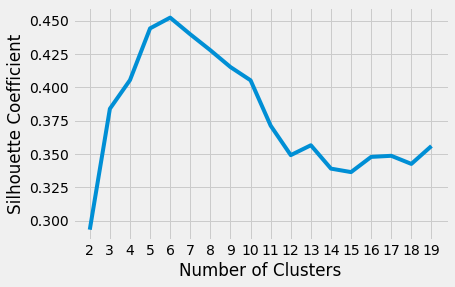

In [ ]:
silhouette_coefficients = []

for k in range(2,20):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_,metric='euclidean')
  silhouette_coefficients.append(score)

print(silhouette_coefficients)

plt.style.use("fivethirtyeight")
plt.plot(range(2,20), silhouette_coefficients)
plt.xticks(range(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The highest Score is achieved with k = 6 

In [ ]:
#Visualize the clusters
kmean = KMeans(n_clusters=6, random_state=42)
kmean.fit(X)
identified_clusters = kmean.fit_predict(X)
data_with_clusters = X.copy()
data_with_clusters['Clusters'] = identified_clusters

fig = px.scatter_3d(data_with_clusters, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Clusters')
fig.show()

Evaluate the clusters using the Calinski-Harabasz Index (the higher the score the more seperated the clusters are)

In [ ]:
chs = metrics.calinski_harabasz_score(X, kmean.labels_)
print(chs)

166.71357349776875


Evaluate the clusters using the Davies Bouldin Score

In [ ]:
dbs = davies_bouldin_score(X, kmean.labels_)
print(dbs)

0.7443002999569566


## Agglomerative Clustering

In [ ]:
#Visualize the clusters
agg = AgglomerativeClustering()
agg.fit(X)
identified_clusters = agg.fit_predict(X)
data_with_clusters = X.copy()
data_with_clusters['Clusters'] = identified_clusters

fig = px.scatter_3d(data_with_clusters, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Clusters')
fig.show()

In [ ]:
chs = metrics.calinski_harabasz_score(X, agg.labels_)
print(chs)

74.99843173085931


In [ ]:
dbs = davies_bouldin_score(X, agg.labels_)
print(dbs)

1.5159923541878777


## Density Algorithms

[-0.09902488951364816, 0.01311730537912744, 0.07687636405239015, 0.15212635871472988, 0.1596939430611063, 0.1759177615505368, 0.19467183638206983, 0.2695999989490317, 0.2760906879191132, 0.3270560727900363, 0.34968927749093837, 0.3692832406310205, 0.3588158894405232]


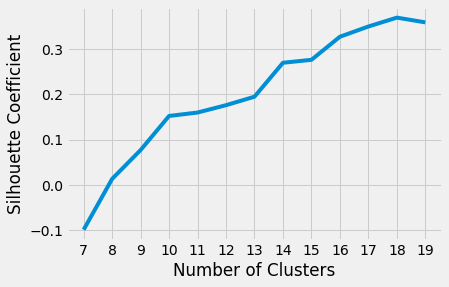

In [ ]:
#We start with 7 so the density algorithm will have more than 1 cluster
dbscan_coefficients = []

for k in range(7,20):
  kmeans = KMeans(n_clusters=k)
  dbscan = DBSCAN(eps=k)
  kmeans.fit(X)
  dbscan.fit(X)
  dbscan_silhouette = silhouette_score(X, dbscan.labels_,metric='euclidean')
  dbscan_coefficients.append(dbscan_silhouette)

print(dbscan_coefficients)

plt.style.use("fivethirtyeight")
plt.plot(range(7,20), dbscan_coefficients)
plt.xticks(range(7,20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The highest score is 18

In [ ]:
#Visualize the clusters
kmean = KMeans(n_clusters=18, random_state=42)
kmean.fit(X)
identified_clusters = kmean.fit_predict(X)
data_with_clusters = X.copy()
data_with_clusters['Clusters'] = identified_clusters

fig = px.scatter_3d(data_with_clusters, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Clusters')
fig.show()